In [ ]:
# ==========================================
# 1. IMPORT LIBRARY
# ==========================================

# Judul: Identifikasi Variabel Ekologis Paling Signifikan terhadap Tingkat Morbiditas DBD di Jawa Tengah 
# sebagai Landasan Strategi Mitigasi Menggunakan Random Forest

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import joblib



# Konfigurasi tampilan
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Library berhasil di-import!")


folder_path = './'

try:
    # Membaca data menggunakan path folder yang sudah ditentukan
    # Menggunakan f-string (f"{...}") untuk menggabungkan folder_path dengan nama file
    df_curah_hujan = pd.read_csv(f"{folder_path}/curah_hujan_fix.csv")
    df_dbd = pd.read_csv(f"{folder_path}/data_dbd.csv")
    df_hari_hujan = pd.read_csv(f"{folder_path}/hari_hujan_fix.csv")
    df_sampah = pd.read_csv(f"{folder_path}/pengelolaan_sampah_fix.csv")
    df_penduduk = pd.read_csv(f"{folder_path}/persentase_penduduk.csv")
    df_sanitasi = pd.read_csv(f"{folder_path}/sanitasi.csv")

    print("\nSUKSES! Semua data berhasil dimuat dari Google Drive.\n")

    # ==========================================
    # PENGECEKAN DATA (Preview)
    # ==========================================
    print("--- Contoh Data Curah Hujan ---")
    display(df_curah_hujan.head())

    print("\n--- Contoh Data DBD ---")
    display(df_dbd.head())

except FileNotFoundError:
    print("\nERROR: File tidak ditemukan!")
    print(f"Sistem mencari di alamat: {folder_path}")
    print("Mohon cek kembali:\n1. Apakah nama folder di variabel 'folder_path' sudah benar?\n2. Apakah file .csv sudah ada di dalam folder tersebut?")

Library berhasil di-import!

SUKSES! Semua data berhasil dimuat dari Google Drive.

--- Contoh Data Curah Hujan ---


,Tahun,Kabupaten/Kota,jumlah (mm)
0,2019,Kab. Cilacap,3947
1,2019,Kab. Banyumas,1273
2,2019,Kab. Purbalingga,1273
3,2019,Kab. Banjarnegara,1273
4,2019,Kab. Kebumen,1273



--- Contoh Data DBD ---


,tahun_data,kab_kota,jumlah,jumlah_meninggal
0,2019,Kab.Cilacap,476,9
1,2019,Kab.Banyumas,202,12
2,2019,Kab.Purbalingga,502,6
3,2019,Kab.Banjarnegara,277,0
4,2019,Kab.Kebumen,259,1


Periksa Data Kosong

In [35]:
# ==========================================
# CEK DATA KOSONG (MISSING VALUES)
# ==========================================

print("=== JUMLAH DATA KOSONG PER KOLOM ===\n")

print("1. Data Curah Hujan:")
print(df_curah_hujan.isnull().sum())
print("-" * 30)

print("2. Data DBD:")
print(df_dbd.isnull().sum())
print("-" * 30)

print("3. Data Hari Hujan:")
print(df_hari_hujan.isnull().sum())
print("-" * 30)

print("4. Data Pengelolaan Sampah:")
print(df_sampah.isnull().sum())
print("-" * 30)

print("5. Data Persentase Penduduk:")
print(df_penduduk.isnull().sum())
print("-" * 30)

print("6. Data Sanitasi:")
print(df_sanitasi.isnull().sum())
print("-" * 30)

=== JUMLAH DATA KOSONG PER KOLOM ===

1. Data Curah Hujan:
Tahun             0
Kabupaten/Kota    0
jumlah (mm)       0
dtype: int64
------------------------------
2. Data DBD:
tahun_data          0
kab_kota            0
jumlah              0
jumlah_meninggal    0
dtype: int64
------------------------------
3. Data Hari Hujan:
Tahun             0
Kabupaten/Kota    0
2019 (Hari)       0
dtype: int64
------------------------------
4. Data Pengelolaan Sampah:
tahun_data    0
kab_kota      0
indikator     0
jumlah        0
satuan        0
dtype: int64
------------------------------
5. Data Persentase Penduduk:
Tahun                                      0
Kabupaten/Kota                             0
Jumlah Penduduk (Ribu)                     0
Laju Pertumbuhan Penduduk per Tahun        0
Persentase Penduduk                        0
Kepadatan Penduduk per km persegi (Km2)    0
Rasio Jenis Kelamin Penduduk               0
dtype: int64
------------------------------
6. Data Sanitasi:
Tahun     

Periksa Data Duplikat

In [36]:
# ==========================================
# CEK DATA DUPLIKAT
# ==========================================

print("=== JUMLAH DATA DUPLIKAT ===\n")

print(f"1. Duplikat di Curah Hujan      : {df_curah_hujan.duplicated().sum()} baris")
print(f"2. Duplikat di Data DBD         : {df_dbd.duplicated().sum()} baris")
print(f"3. Duplikat di Hari Hujan       : {df_hari_hujan.duplicated().sum()} baris")
print(f"4. Duplikat di Pengelolaan Sampah: {df_sampah.duplicated().sum()} baris")
print(f"5. Duplikat di Persentase Penduduk: {df_penduduk.duplicated().sum()} baris")
print(f"6. Duplikat di Sanitasi         : {df_sanitasi.duplicated().sum()} baris")

=== JUMLAH DATA DUPLIKAT ===

1. Duplikat di Curah Hujan      : 0 baris
2. Duplikat di Data DBD         : 0 baris
3. Duplikat di Hari Hujan       : 0 baris
4. Duplikat di Pengelolaan Sampah: 0 baris
5. Duplikat di Persentase Penduduk: 0 baris
6. Duplikat di Sanitasi         : 0 baris


Periksa Data Outlier


In [37]:
# ==========================================
# CEK DATA OUTLIER (METODE IQR)
# ==========================================

def cek_outlier_angka(df, nama_dataset):
    print(f"--- Pengecekan Outlier: {nama_dataset} ---")

    # 1. Ambil hanya kolom yang berisi angka (integer/float)
    kolom_angka = df.select_dtypes(include=['float64', 'int64']).columns

    # 2. Hapus kolom 'Tahun' dari pengecekan karena tahun bukan data yang dicari outliernya
    kolom_angka = [col for col in kolom_angka if 'ahun' not in col.lower()]

    ditemukan = False
    for col in kolom_angka:
        # Rumus IQR (Interquartile Range)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        batas_bawah = Q1 - 1.5 * IQR
        batas_atas = Q3 + 1.5 * IQR

        # Hitung berapa baris yang keluar dari batas
        jumlah_outlier = ((df[col] < batas_bawah) | (df[col] > batas_atas)).sum()

        if jumlah_outlier > 0:
            print(f"> Kolom '{col}': Ada {jumlah_outlier} data outlier")
            ditemukan = True

    if not ditemukan:
        print("> Data aman (Tidak ada outlier signifikan)")
    print("") # Baris baru untuk spasi

# Jalankan fungsi untuk semua data
cek_outlier_angka(df_curah_hujan, "Curah Hujan")
cek_outlier_angka(df_dbd, "Data DBD")
cek_outlier_angka(df_hari_hujan, "Hari Hujan")
cek_outlier_angka(df_sampah, "Pengelolaan Sampah")
cek_outlier_angka(df_penduduk, "Persentase Penduduk")
cek_outlier_angka(df_sanitasi, "Sanitasi")

--- Pengecekan Outlier: Curah Hujan ---
> Kolom 'jumlah (mm)': Ada 39 data outlier

--- Pengecekan Outlier: Data DBD ---
> Kolom 'jumlah': Ada 5 data outlier
> Kolom 'jumlah_meninggal': Ada 12 data outlier

--- Pengecekan Outlier: Hari Hujan ---
> Kolom '2019 (Hari)': Ada 1 data outlier

--- Pengecekan Outlier: Pengelolaan Sampah ---
> Kolom 'jumlah': Ada 11 data outlier

--- Pengecekan Outlier: Persentase Penduduk ---
> Kolom 'Kepadatan Penduduk per km persegi (Km2)': Ada 30 data outlier

--- Pengecekan Outlier: Sanitasi ---
> Kolom 'Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak': Ada 12 data outlier



Verifikasi Data Outlier

In [38]:
# ==========================================
# TAHAP VERIFIKASI OUTLIER
# ==========================================

def verifikasi_outlier(df, judul, kolom):
    print(f"=== VERIFIKASI DATA: {judul} ===")

    # Hitung batas wajar (Metode IQR)
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    batas_atas = Q3 + 1.5 * IQR

    # Ambil data yang melebihi batas
    outliers = df[df[kolom] > batas_atas]

    if len(outliers) > 0:
        print(f"Ditemukan {len(outliers)} data ekstrem (Di atas {batas_atas:.2f}):")

        # Tampilkan kolom penting saja agar mudah dibaca
        cols = ['Tahun' if 'Tahun' in df.columns else 'tahun_data',
                'Kabupaten/Kota' if 'Kabupaten/Kota' in df.columns else 'kab_kota',
                kolom]

        # Tampilkan 5 data tertinggi
        display(outliers[cols].sort_values(by=kolom, ascending=False).head(5))

        print("\n--- REKOMENDASI TINDAKAN ---")
        if "Penduduk" in judul:
            print("Analisis: Data ekstrem terjadi di wilayah 'Kota' (bukan Kabupaten).")
            print("Kesimpulan: INI DATA WAJAR. Kota memang lebih padat dari Kabupaten.")
            print("Tindakan: DIBIARKAN (KEEP).")
        elif "Hujan" in judul:
            print("Analisis: Nilai curah hujan tinggi (misal 3000-4000mm) wajar di daerah tropis saat musim hujan ekstrem.")
            print("Tindakan: DIBIARKAN (KEEP), kecuali ada angka tidak masuk akal (misal >10.000 sehari).")
        elif "DBD" in judul:
            print("Analisis: Angka tinggi menunjukkan adanya wabah (KLB) di daerah tersebut.")
            print("Tindakan: DIBIARKAN (KEEP). Ini adalah informasi krusial.")
        elif "Sampah" in judul:
            print("Analisis: Kota besar (seperti Semarang) pasti memiliki sampah jauh lebih banyak.")
            print("Tindakan: DIBIARKAN (KEEP).")

    else:
        print("Data aman. Tidak ada nilai ekstrem yang mencurigakan.")

    print("\n" + "="*50 + "\n")

# Jalankan Verifikasi
verifikasi_outlier(df_curah_hujan, "Curah Hujan", 'jumlah (mm)')
verifikasi_outlier(df_dbd, "Kasus DBD", 'jumlah')
verifikasi_outlier(df_penduduk, "Kepadatan Penduduk", 'Kepadatan Penduduk per km persegi (Km2)')
verifikasi_outlier(df_sampah, "Timbulan Sampah", 'jumlah')

=== VERIFIKASI DATA: Curah Hujan ===
Ditemukan 5 data ekstrem (Di atas 3368.75):


,Tahun,Kabupaten/Kota,jumlah (mm)
35,2020,Kab. Cilacap,4496
39,2020,Kab. Kebumen,4479
0,2019,Kab. Cilacap,3947
53,2020,Kab. Kudus,3639
41,2020,Kab. Wonosobo,3459



--- REKOMENDASI TINDAKAN ---
Analisis: Nilai curah hujan tinggi (misal 3000-4000mm) wajar di daerah tropis saat musim hujan ekstrem.
Tindakan: DIBIARKAN (KEEP), kecuali ada angka tidak masuk akal (misal >10.000 sehari).


=== VERIFIKASI DATA: Kasus DBD ===
Ditemukan 5 data ekstrem (Di atas 666.25):


,tahun_data,kab_kota,jumlah
119,2022,Kab.Grobogan,1275
122,2022,Kab.Pati,911
105,2022,Kab.Cilacap,902
137,2022,Kota Semarang,865
12,2019,Kab.Karanganyar,838



--- REKOMENDASI TINDAKAN ---
Analisis: Angka tinggi menunjukkan adanya wabah (KLB) di daerah tersebut.
Tindakan: DIBIARKAN (KEEP). Ini adalah informasi krusial.


=== VERIFIKASI DATA: Kepadatan Penduduk ===
Ditemukan 30 data ekstrem (Di atas 3116.75):


,Tahun,Kabupaten/Kota,Kepadatan Penduduk per km persegi (Km2)
170,2023,Kota Surakarta,11320
135,2022,Kota Surakarta,11287
100,2021,Kota Surakarta,11256
65,2020,Kota Surakarta,11248
30,2019,Kota Surakarta,11189



--- REKOMENDASI TINDAKAN ---
Analisis: Data ekstrem terjadi di wilayah 'Kota' (bukan Kabupaten).
Kesimpulan: INI DATA WAJAR. Kota memang lebih padat dari Kabupaten.
Tindakan: DIBIARKAN (KEEP).


=== VERIFIKASI DATA: Timbulan Sampah ===
Ditemukan 11 data ekstrem (Di atas 275018.04):


,tahun_data,kab_kota,jumlah
32,2019,Kota Semarang,463375.00
137,2022,Kota Semarang,461288.66
172,2023,Kota Semarang,457813.14
67,2020,Kota Semarang,456208.57
102,2021,Kota Semarang,456208.57



--- REKOMENDASI TINDAKAN ---
Analisis: Kota besar (seperti Semarang) pasti memiliki sampah jauh lebih banyak.
Tindakan: DIBIARKAN (KEEP).




Cleaning dan Merge Data

In [39]:
# ==========================================
# TAHAP: CLEANING & MERGING (PENGGABUNGAN DATA)
# ==========================================

# 1. FUNGSI PENYERAGAMAN NAMA KOTA
def bersihkan_nama_kota(nama):
    # Ubah menjadi string jika bukan string
    nama = str(nama)
    # Hapus "Kab." atau "Kab " di depan nama
    nama = nama.replace("Kab.", "").replace("Kab ", "")
    # Hapus spasi berlebih di awal/akhir
    return nama.strip()

# 2. PROSES MEMBERSIHKAN SETIAP DATASET
print("Sedang memproses data...")

# --- A. Data Curah Hujan ---
df_hujan_clean = df_curah_hujan.copy()
df_hujan_clean['Kabupaten/Kota'] = df_hujan_clean['Kabupaten/Kota'].apply(bersihkan_nama_kota)
df_hujan_clean = df_hujan_clean.rename(columns={'jumlah (mm)': 'curah_hujan_mm'})

# --- B. Data DBD ---
df_dbd_clean = df_dbd.copy()
df_dbd_clean = df_dbd_clean.rename(columns={'tahun_data': 'Tahun', 'kab_kota': 'Kabupaten/Kota',
                                            'jumlah': 'kasus_dbd', 'jumlah_meninggal': 'meninggal_dbd'})
df_dbd_clean['Kabupaten/Kota'] = df_dbd_clean['Kabupaten/Kota'].apply(bersihkan_nama_kota)

# --- C. Data Hari Hujan ---
df_hari_clean = df_hari_hujan.copy()
# Kolom '2019 (Hari)' tampaknya berisi data hari hujan untuk semua tahun, kita ubah namanya
col_hari = [c for c in df_hari_clean.columns if 'Hari' in c][0]
df_hari_clean = df_hari_clean.rename(columns={col_hari: 'jumlah_hari_hujan'})
df_hari_clean['Kabupaten/Kota'] = df_hari_clean['Kabupaten/Kota'].apply(bersihkan_nama_kota)

# --- D. Data Sampah ---
df_sampah_clean = df_sampah.copy()
df_sampah_clean = df_sampah_clean.rename(columns={'tahun_data': 'Tahun', 'kab_kota': 'Kabupaten/Kota',
                                                  'jumlah': 'timbulan_sampah_ton'})
df_sampah_clean['Kabupaten/Kota'] = df_sampah_clean['Kabupaten/Kota'].apply(bersihkan_nama_kota)
# Ambil kolom penting saja (buang indikator/satuan karena isinya sama semua)
df_sampah_clean = df_sampah_clean[['Tahun', 'Kabupaten/Kota', 'timbulan_sampah_ton']]

# --- E. Data Penduduk ---
df_penduduk_clean = df_penduduk.copy()
df_penduduk_clean['Kabupaten/Kota'] = df_penduduk_clean['Kabupaten/Kota'].apply(bersihkan_nama_kota)
# Sederhanakan nama kolom yang panjang
df_penduduk_clean = df_penduduk_clean.rename(columns={
    'Jumlah Penduduk (Ribu)': 'penduduk_ribu',
    'Kepadatan Penduduk per km persegi (Km2)': 'kepadatan_penduduk_km2',
    'Persentase Penduduk': 'persentase_penduduk'
})
# Ambil kolom yang relevan saja untuk analisis
cols_penduduk = ['Tahun', 'Kabupaten/Kota', 'penduduk_ribu', 'kepadatan_penduduk_km2']
df_penduduk_clean = df_penduduk_clean[cols_penduduk]

# --- F. Data Sanitasi ---
df_sanitasi_clean = df_sanitasi.copy()
df_sanitasi_clean['Kabupaten/Kota'] = df_sanitasi_clean['Kabupaten/Kota'].apply(bersihkan_nama_kota)
df_sanitasi_clean = df_sanitasi_clean.rename(columns={
    'Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak': 'akses_sanitasi_layak_persen'
})

# 3. MENGGABUNGKAN SEMUA DATA (MERGING)
# Kita gabung bertahap menggunakan "Tahun" dan "Kabupaten/Kota" sebagai Kunci (Key)

df_gabungan = df_hujan_clean.merge(df_dbd_clean, on=['Tahun', 'Kabupaten/Kota'], how='outer')
df_gabungan = df_gabungan.merge(df_hari_clean, on=['Tahun', 'Kabupaten/Kota'], how='outer')
df_gabungan = df_gabungan.merge(df_sampah_clean, on=['Tahun', 'Kabupaten/Kota'], how='outer')
df_gabungan = df_gabungan.merge(df_penduduk_clean, on=['Tahun', 'Kabupaten/Kota'], how='outer')
df_gabungan = df_gabungan.merge(df_sanitasi_clean, on=['Tahun', 'Kabupaten/Kota'], how='outer')

print("\nSUKSES! Data berhasil digabungkan.")
print(f"Ukuran Data Akhir: {df_gabungan.shape[0]} baris, {df_gabungan.shape[1]} kolom")

# Tampilkan sampel data
print("\n--- 5 Data Teratas Hasil Gabungan ---")
display(df_gabungan.head())

# Cek apakah ada data yang hilang setelah penggabungan
print("\n--- Cek Kekosongan Data (Null) di Data Gabungan ---")
print(df_gabungan.isnull().sum())




Sedang memproses data...

SUKSES! Data berhasil digabungkan.
Ukuran Data Akhir: 175 baris, 10 kolom

--- 5 Data Teratas Hasil Gabungan ---


,Tahun,Kabupaten/Kota,curah_hujan_mm,kasus_dbd,meninggal_dbd,jumlah_hari_hujan,timbulan_sampah_ton,penduduk_ribu,kepadatan_penduduk_km2,akses_sanitasi_layak_persen
0,2019,Banjarnegara,1273,277,0,159,199839.0,923.2,902,24.07
1,2019,Banyumas,1273,202,12,161,238272.0,1693.0,1268,67.06
2,2019,Batang,1273,359,3,125,120286.0,773.1,980,50.28
3,2019,Blora,1273,311,7,106,116664.0,856.3,470,83.49
4,2019,Boyolali,1273,413,1,126,140417.0,984.8,977,79.48



--- Cek Kekosongan Data (Null) di Data Gabungan ---
Tahun                          0
Kabupaten/Kota                 0
curah_hujan_mm                 0
kasus_dbd                      0
meninggal_dbd                  0
jumlah_hari_hujan              0
timbulan_sampah_ton            0
penduduk_ribu                  0
kepadatan_penduduk_km2         0
akses_sanitasi_layak_persen    0
dtype: int64


Pengecekan Kembali Setelah Merge dan Hitung Mobilitas

In [40]:
# ==========================================
# TAHAP: PENGECEKAN DATA SETELAH MERGING
# ==========================================

df_gabungan['IR_DBD_per_100k'] = (df_gabungan['kasus_dbd'] / (df_gabungan['penduduk_ribu'] * 1000)) * 100000

print("Target Morbiditas (IR) berhasil dihitung!")
df_gabungan[['Kabupaten/Kota', 'Tahun', 'kasus_dbd', 'IR_DBD_per_100k']].head()


print("=== 1. INFORMASI UMUM DATA GABUNGAN ===")
# Mengecek tipe data dan memori
df_gabungan.info()
print("\n")

print("=== 2. CEK DATA KOSONG (NULL) ===")
# Memastikan tidak ada data yang hilang saat penggabungan
jumlah_null = df_gabungan.isnull().sum()
print(jumlah_null)

# Peringatan otomatis jika ada data kosong
if jumlah_null.sum() > 0:
    print("\n[!] WARNING: Ada data kosong. Kemungkinan ada nama kota yang tidak cocok.")
    print("Saran: Cek kembali ejaan nama kota di file asli.")
else:
    print("\n[OK] Data bersih. Tidak ada missing values.")

print("\n=== 3. PREVIEW DATA (ATAS & BAWAH) ===")
print("--- 5 Baris Teratas ---")
display(df_gabungan.head())

print("\n--- 5 Baris Terbawah ---")
display(df_gabungan.tail())

print("\n=== 4. STATISTIK DESKRIPTIF ===")
# Melihat rangkuman angka (rata-rata, min, max) dari tabel gabungan
display(df_gabungan.describe())

Target Morbiditas (IR) berhasil dihitung!
=== 1. INFORMASI UMUM DATA GABUNGAN ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tahun                        175 non-null    int64  
 1   Kabupaten/Kota               175 non-null    object 
 2   curah_hujan_mm               175 non-null    int64  
 3   kasus_dbd                    175 non-null    int64  
 4   meninggal_dbd                175 non-null    int64  
 5   jumlah_hari_hujan            175 non-null    int64  
 6   timbulan_sampah_ton          175 non-null    float64
 7   penduduk_ribu                175 non-null    float64
 8   kepadatan_penduduk_km2       175 non-null    int64  
 9   akses_sanitasi_layak_persen  175 non-null    float64
 10  IR_DBD_per_100k              175 non-null    float64
dtypes: float64(4), int64(6), object(1)
memory usage: 15.2+

,Tahun,Kabupaten/Kota,curah_hujan_mm,kasus_dbd,meninggal_dbd,jumlah_hari_hujan,timbulan_sampah_ton,penduduk_ribu,kepadatan_penduduk_km2,akses_sanitasi_layak_persen,IR_DBD_per_100k
0,2019,Banjarnegara,1273,277,0,159,199839.0,923.2,902,24.07,30.004333
1,2019,Banyumas,1273,202,12,161,238272.0,1693.0,1268,67.06,11.931483
2,2019,Batang,1273,359,3,125,120286.0,773.1,980,50.28,46.436425
3,2019,Blora,1273,311,7,106,116664.0,856.3,470,83.49,36.319047
4,2019,Boyolali,1273,413,1,126,140417.0,984.8,977,79.48,41.937449



--- 5 Baris Terbawah ---


,Tahun,Kabupaten/Kota,curah_hujan_mm,kasus_dbd,meninggal_dbd,jumlah_hari_hujan,timbulan_sampah_ton,penduduk_ribu,kepadatan_penduduk_km2,akses_sanitasi_layak_persen,IR_DBD_per_100k
170,2023,Sukoharjo,2100,233,1,145,121703.24,929.1,1994,95.68,25.078033
171,2023,Tegal,2100,401,1,145,282697.16,1653.6,1881,85.87,24.250121
172,2023,Temanggung,2100,17,0,147,106927.83,808.7,929,69.89,2.102139
173,2023,Wonogiri,2100,31,0,122,163148.24,1063.8,584,96.12,2.914082
174,2023,Wonosobo,2100,49,0,178,134105.74,909.7,924,58.14,5.386391



=== 4. STATISTIK DESKRIPTIF ===


,Tahun,curah_hujan_mm,kasus_dbd,meninggal_dbd,jumlah_hari_hujan,timbulan_sampah_ton,penduduk_ribu,kepadatan_penduduk_km2,akses_sanitasi_layak_persen,IR_DBD_per_100k
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,2021.000000,2256.788571,225.685714,4.291429,166.057143,158104.863200,1044.217714,2074.445714,82.575600,22.482273
std,1.418272,595.695349,194.992952,5.428817,33.171570,80228.945043,451.424462,2323.310657,13.969712,16.190244
min,2019.000000,1273.000000,17.000000,0.000000,105.000000,26756.290000,121.500000,470.000000,17.340000,2.102139
25%,2020.000000,2100.000000,85.000000,1.000000,142.500000,118509.945000,817.650000,970.500000,77.845000,11.180175
50%,2021.000000,2479.000000,166.000000,3.000000,165.000000,143493.630000,1017.800000,1176.000000,85.900000,18.941333
75%,2022.000000,2607.500000,317.500000,5.500000,185.500000,181113.185000,1316.800000,1829.000000,92.665000,28.433349
max,2023.000000,4496.000000,1275.000000,33.000000,253.000000,463375.000000,2041.400000,11320.000000,98.150000,94.486413


Data Engineering

Berikut adalah fitur baru yang akan kita buat:

IR_DBD_per_100k (Incidence Rate): Angka kejadian DBD per 100.000 penduduk. Ini adalah standar WHO/Kemenkes untuk mengukur parahnya wabah, lebih akurat daripada sekadar "Jumlah Kasus".

CFR_DBD_persen (Case Fatality Rate): Persentase kematian dari penderita DBD. Mengukur seberapa mematikan wabah tersebut.

intensitas_hujan: Rata-rata curah hujan dalam satu hari hujan (Curah Hujan / Hari Hujan).

sampah_per_kapita_kg: Berapa kg sampah yang dihasilkan satu orang dalam setahun.

In [41]:
# ==========================================
# TAHAP: FEATURE ENGINEERING (MEMBUAT FITUR BARU)
# ==========================================

# Pastikan df_gabungan sudah ada dari langkah sebelumnya

# 1. Incidence Rate (IR)
# Rumus: (Jumlah Kasus / Jumlah Penduduk) * 100.000
# Karena data penduduk dalam 'Ribuan' (contoh: 1727.1 ribu = 1.727.100), rumusnya disederhanakan:
# (Kasus / (Penduduk_Ribu * 1000)) * 100.000  --> (Kasus / Penduduk_Ribu) * 100
df_gabungan['IR_DBD_per_100k'] = (df_gabungan['kasus_dbd'] / df_gabungan['penduduk_ribu']) * 100

# 2. Case Fatality Rate (CFR)
# Rumus: (Jumlah Meninggal / Jumlah Kasus) * 100%
df_gabungan['CFR_DBD_persen'] = (df_gabungan['meninggal_dbd'] / df_gabungan['kasus_dbd']) * 100
# Jika kasus 0, maka CFR akan error/NaN. Kita ganti jadi 0.
df_gabungan['CFR_DBD_persen'] = df_gabungan['CFR_DBD_persen'].fillna(0)

# 3. Intensitas Hujan (mm/hari)
# Rumus: Total Curah Hujan / Jumlah Hari Hujan
df_gabungan['intensitas_hujan'] = df_gabungan['curah_hujan_mm'] / df_gabungan['jumlah_hari_hujan']

# 4. Sampah per Kapita (kg/orang/tahun)
# Rumus: (Total Sampah (Ton) * 1000) / (Penduduk (Ribu) * 1000) --> Ton / Ribu
df_gabungan['sampah_per_kapita_kg'] = df_gabungan['timbulan_sampah_ton'] / df_gabungan['penduduk_ribu']

# Tampilkan Hasil
print("=== SUKSES! Fitur Baru Berhasil Ditambahkan ===")
cols_baru = ['Kabupaten/Kota', 'Tahun', 'IR_DBD_per_100k', 'CFR_DBD_persen', 'intensitas_hujan', 'sampah_per_kapita_kg']
display(df_gabungan[cols_baru].head())

print("\n--- Statistik Fitur Baru ---")
display(df_gabungan[['IR_DBD_per_100k', 'CFR_DBD_persen']].describe())

=== SUKSES! Fitur Baru Berhasil Ditambahkan ===


,Kabupaten/Kota,Tahun,IR_DBD_per_100k,CFR_DBD_persen,intensitas_hujan,sampah_per_kapita_kg
0,Banjarnegara,2019,30.004333,0.000000,8.006289,216.463388
1,Banyumas,2019,11.931483,5.940594,7.906832,140.739516
2,Batang,2019,46.436425,0.835655,10.184000,155.589186
3,Blora,2019,36.319047,2.250804,12.009434,136.241971
4,Boyolali,2019,41.937449,0.242131,10.103175,142.584281



--- Statistik Fitur Baru ---


,IR_DBD_per_100k,CFR_DBD_persen
count,175.000000,175.000000
mean,22.482273,2.018658
std,16.190244,2.111960
min,2.102139,0.000000
25%,11.180175,0.509117
50%,18.941333,1.587302
75%,28.433349,2.952070
max,94.486413,12.500000


Analisis Korelasi

=== FAKTOR YANG BERHUBUNGAN DENGAN KASUS DBD ===
kasus_dbd                      1.000000
IR_DBD_per_100k                0.786090
penduduk_ribu                  0.422780
timbulan_sampah_ton            0.417487
intensitas_hujan               0.047306
curah_hujan_mm                 0.045646
jumlah_hari_hujan              0.014813
akses_sanitasi_layak_persen   -0.005088
sampah_per_kapita_kg          -0.080075
kepadatan_penduduk_km2        -0.198057
Name: kasus_dbd, dtype: float64




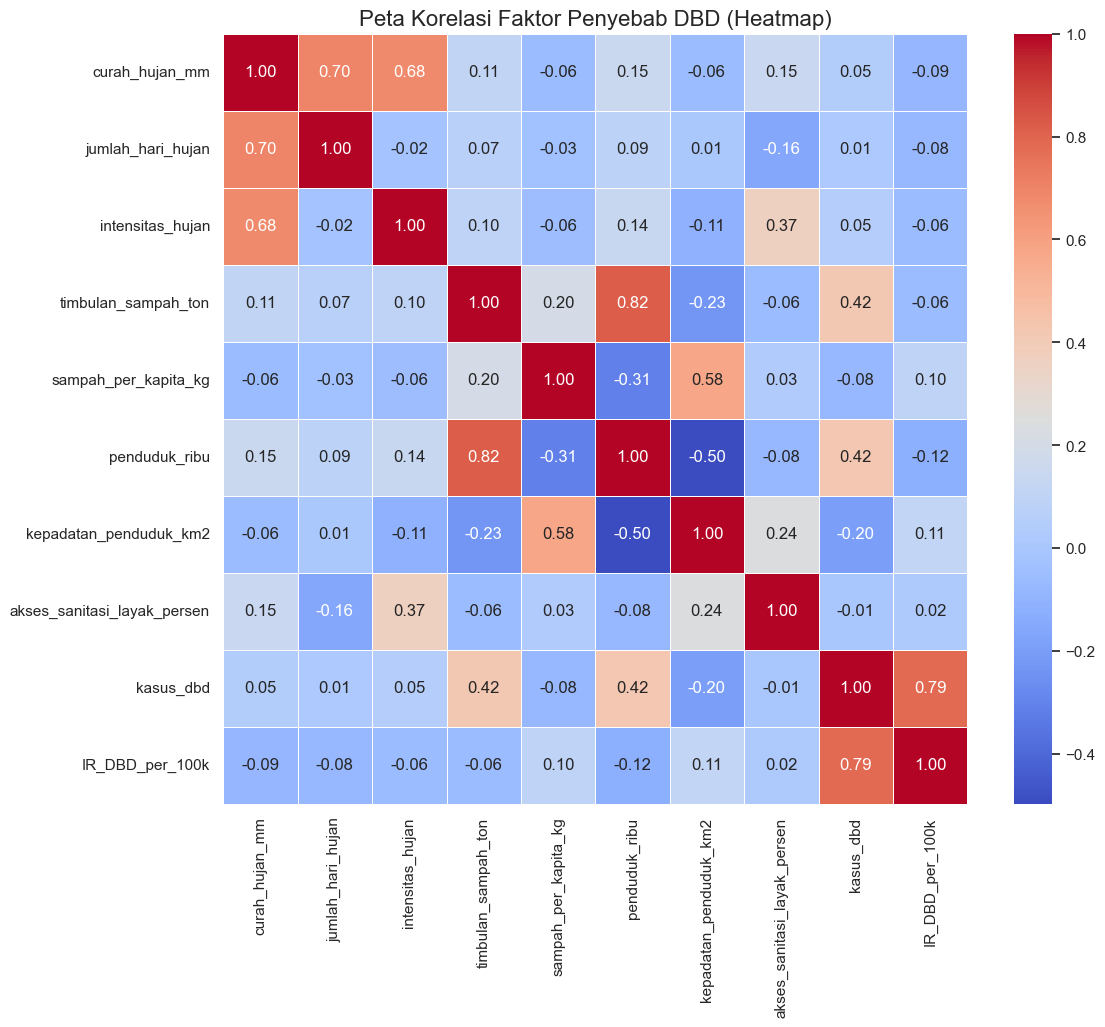

In [42]:
# ==========================================
# TAHAP: ANALISIS KORELASI & HEATMAP
# ==========================================
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Memilih Kolom Angka untuk Dianalisis
# Kita hanya mengambil kolom yang relevan (bukan tahun atau nama kota)
kolom_analisis = [
    'curah_hujan_mm', 'jumlah_hari_hujan', 'intensitas_hujan',
    'timbulan_sampah_ton', 'sampah_per_kapita_kg',
    'penduduk_ribu', 'kepadatan_penduduk_km2',
    'akses_sanitasi_layak_persen',
    'kasus_dbd', 'IR_DBD_per_100k'
]

# 2. Menghitung Matriks Korelasi
# Fungsi .corr() akan menghitung angka -1 (berlawanan) hingga +1 (sejalan)
korelasi = df_gabungan[kolom_analisis].corr()

# Tampilkan angka korelasi terhadap Kasus DBD (diurutkan dari yang terkuat)
print("=== FAKTOR YANG BERHUBUNGAN DENGAN KASUS DBD ===")
print(korelasi['kasus_dbd'].sort_values(ascending=False))
print("\n")

# 3. Membuat Visualisasi Heatmap
plt.figure(figsize=(12, 10))

# Membuat heatmap dengan warna 'coolwarm' (Merah=Positif Kuat, Biru=Negatif Kuat)
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Peta Korelasi Faktor Penyebab DBD (Heatmap)', fontsize=16)
plt.show()

EDA DAN VISUALISASI

Q1 :
Apakah daerah yang sangat padat selalu memiliki risiko DBD tinggi, ataukah sanitasi yang baik bisa mematahkan hubungan tersebut?

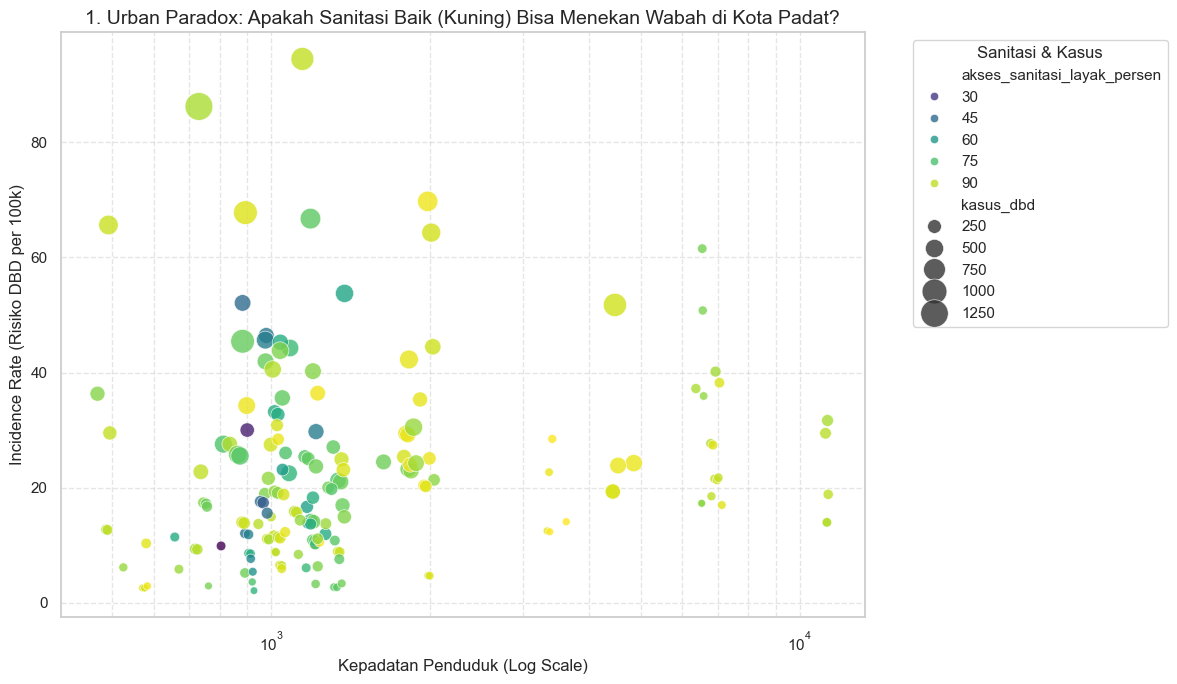

In [43]:
# ==========================================
# 1. EDA: THE URBAN PARADOX
# ==========================================
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

# Scatter Plot 3 Variabel:
# X = Kepadatan Penduduk (Log Scale karena range-nya jauh)
# Y = Incidence Rate (Risiko Tertular per 100rb penduduk)
# Warna = Kualitas Sanitasi (Makin terang makin bagus)
# Ukuran = Total Jumlah Kasus
sns.scatterplot(data=df_gabungan,
                x='kepadatan_penduduk_km2',
                y='IR_DBD_per_100k',
                hue='akses_sanitasi_layak_persen',
                palette='viridis',
                size='kasus_dbd',
                sizes=(30, 400),
                alpha=0.8)

plt.title('1. Urban Paradox: Apakah Sanitasi Baik (Kuning) Bisa Menekan Wabah di Kota Padat?', fontsize=14)
plt.xscale('log')
plt.xlabel('Kepadatan Penduduk (Log Scale)')
plt.ylabel('Incidence Rate (Risiko DBD per 100k)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Sanitasi & Kasus")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

Q2 : Apakah daerah dengan kasus terbanyak (IR Tinggi) juga memiliki tingkat kematian tertinggi? Atau justru daerah dengan kasus sedikit yang lebih "mematikan" (CFR Tinggi) karena kurang siap?

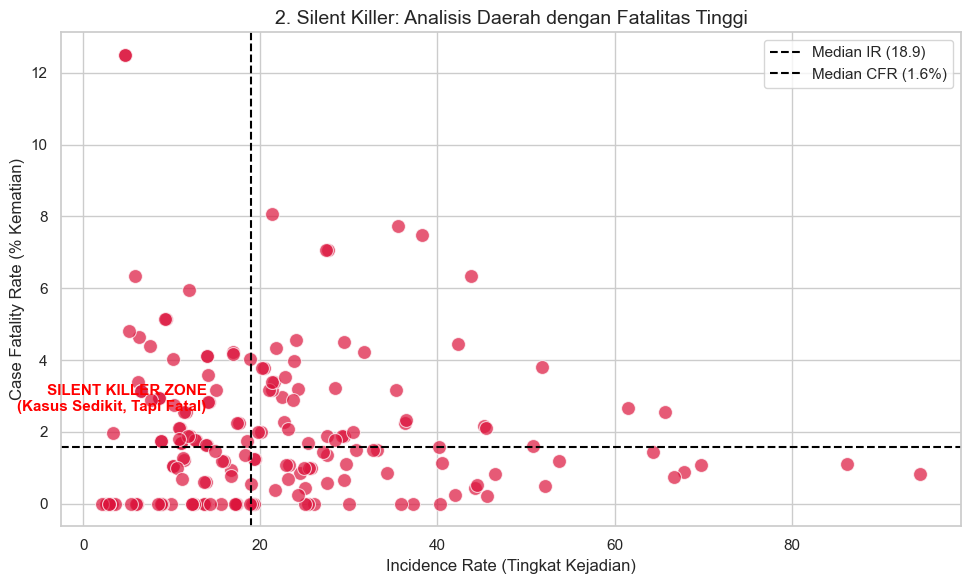

In [44]:
# ==========================================
# 2. EDA: SILENT KILLER ANALYSIS
# ==========================================
plt.figure(figsize=(10, 6))

# Plot hubungan Kejadian (IR) vs Kematian (CFR)
sns.scatterplot(data=df_gabungan, x='IR_DBD_per_100k', y='CFR_DBD_persen',
                color='crimson', s=100, alpha=0.7)

# Garis Median untuk membagi 4 Kuadran
median_ir = df_gabungan['IR_DBD_per_100k'].median()
median_cfr = df_gabungan['CFR_DBD_persen'].median()

plt.axvline(x=median_ir, color='black', linestyle='--', label=f'Median IR ({median_ir:.1f})')
plt.axhline(y=median_cfr, color='black', linestyle='--', label=f'Median CFR ({median_cfr:.1f}%)')

# Label Zona Berbahaya
plt.text(median_ir - 5, median_cfr + 1, 'SILENT KILLER ZONE\n(Kasus Sedikit, Tapi Fatal)',
         color='red', fontsize=11, ha='right', weight='bold')

plt.title('2. Silent Killer: Analisis Daerah dengan Fatalitas Tinggi', fontsize=14)
plt.xlabel('Incidence Rate (Tingkat Kejadian)')
plt.ylabel('Case Fatality Rate (% Kematian)')
plt.legend()
plt.tight_layout()
plt.show()

Q3 : Faktor hujan apa yang sebenarnya memicu ledakan kasus? Apakah jumlah airnya (Curah Hujan Total), seringnya hujan turun (Hari Hujan), atau seberapa deras hujan itu turun sekali waktu (Intensitas)?

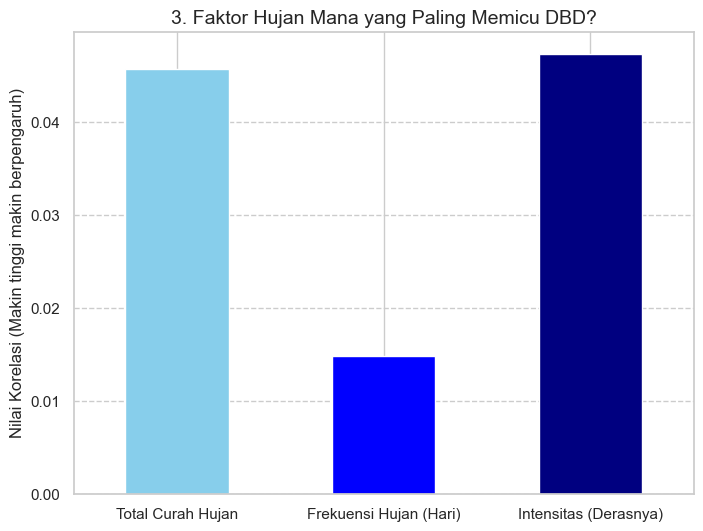

In [45]:
# ==========================================
# 3. EDA: CLIMATE TRIGGER NUANCE
# ==========================================
plt.figure(figsize=(8, 6))

# Kolom cuaca yang akan diuji korelasinya
cols_hujan = ['curah_hujan_mm', 'jumlah_hari_hujan', 'intensitas_hujan']

# Hitung korelasi hanya terhadap kolom 'kasus_dbd'
corr_hujan = df_gabungan[cols_hujan].corrwith(df_gabungan['kasus_dbd'])

# Plot Bar Chart
ax = corr_hujan.plot(kind='bar', color=['skyblue', 'blue', 'navy'])

plt.title('3. Faktor Hujan Mana yang Paling Memicu DBD?', fontsize=14)
plt.ylabel('Nilai Korelasi (Makin tinggi makin berpengaruh)')
plt.xticks(ticks=[0,1,2], labels=['Total Curah Hujan', 'Frekuensi Hujan (Hari)', 'Intensitas (Derasnya)'], rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

Q4 : Apakah total tumpukan sampah kota yang menjadi masalah, atau gaya hidup masyarakatnya (sampah per orang) yang lebih berkorelasi dengan wabah?

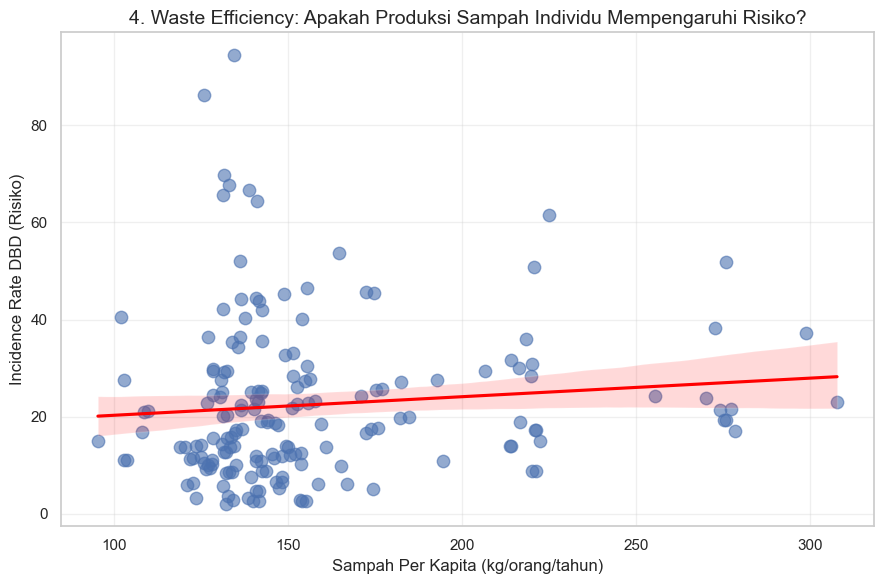

In [46]:
# ==========================================
# 4. EDA: WASTE EFFICIENCY
# ==========================================
plt.figure(figsize=(9, 6))

# Regplot untuk melihat tren
sns.regplot(data=df_gabungan, x='sampah_per_kapita_kg', y='IR_DBD_per_100k',
            scatter_kws={'alpha':0.6, 's':80}, line_kws={'color':'red'})

plt.title('4. Waste Efficiency: Apakah Produksi Sampah Individu Mempengaruhi Risiko?', fontsize=14)
plt.xlabel('Sampah Per Kapita (kg/orang/tahun)')
plt.ylabel('Incidence Rate DBD (Risiko)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Q5 : Apakah pusat wabah (Hotspot) berpindah selama 5 tahun terakhir (2019-2023)? Apakah ada daerah yang dulunya aman tiba-tiba menjadi zona merah?

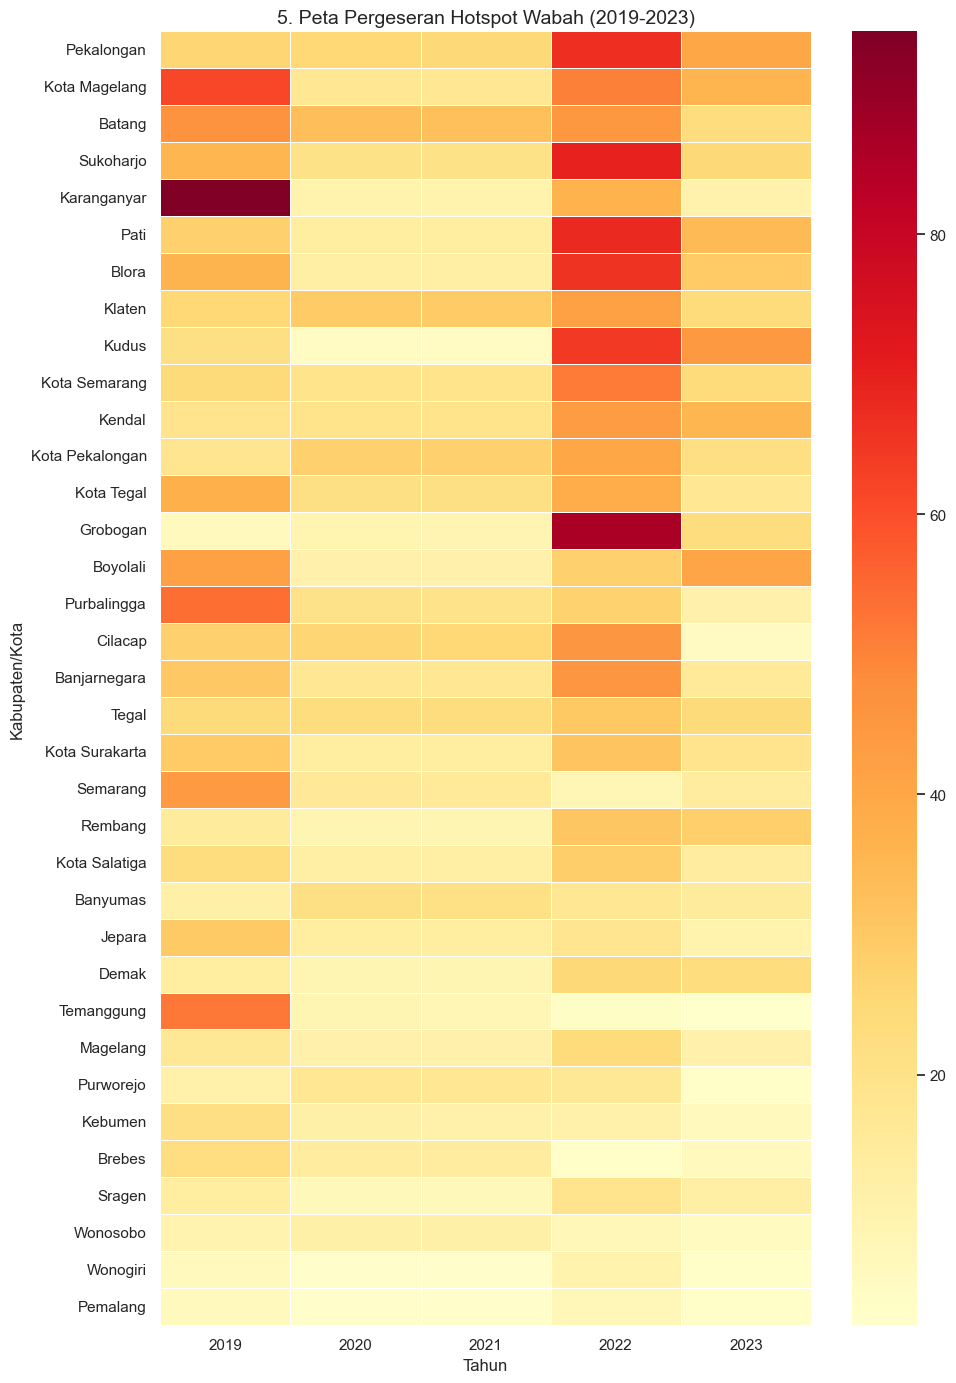

In [47]:
# ==========================================
# 5. EDA: SHIFTING HOTSPOTS (HEATMAP)
# ==========================================
plt.figure(figsize=(10, 14)) # Ukuran tinggi agar semua nama kota terbaca

# Pivot Data: Baris=Kota, Kolom=Tahun, Isi=IR DBD
pivot_ir = df_gabungan.pivot_table(index='Kabupaten/Kota', columns='Tahun', values='IR_DBD_per_100k')

# Urutkan berdasarkan rata-rata kejadian tertinggi agar yang parah ada di atas
pivot_ir['rata_rata'] = pivot_ir.mean(axis=1)
pivot_ir_sorted = pivot_ir.sort_values('rata_rata', ascending=False).drop('rata_rata', axis=1)

# Heatmap
sns.heatmap(pivot_ir_sorted, cmap='YlOrRd', annot=False, linewidths=.5)

plt.title('5. Peta Pergeseran Hotspot Wabah (2019-2023)', fontsize=14)
plt.xlabel('Tahun')
plt.ylabel('Kabupaten/Kota')
plt.tight_layout()
plt.show()

Q6 : Jika kita membagi kabupaten ke dalam 4 kuadran (Risiko Tinggi-Sanitasi Buruk vs Risiko Rendah-Sanitasi Baik), siapa yang berada di zona paling berbahaya?

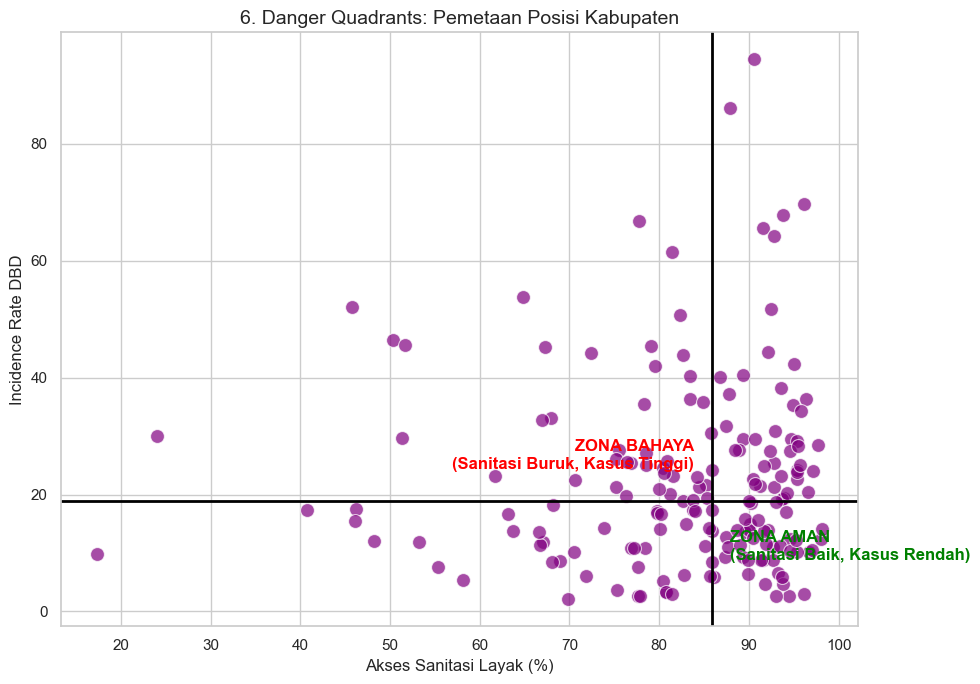

In [48]:
# ==========================================
# 6. EDA: DANGER QUADRANTS
# ==========================================
plt.figure(figsize=(10, 7))

# Ambil nilai tengah (median) sebagai pembatas kuadran
batas_sanitasi = df_gabungan['akses_sanitasi_layak_persen'].median()
batas_ir = df_gabungan['IR_DBD_per_100k'].median()

# Scatter Plot
sns.scatterplot(data=df_gabungan, x='akses_sanitasi_layak_persen', y='IR_DBD_per_100k',
                color='purple', s=100, alpha=0.7)

# Garis Pembatas
plt.axvline(x=batas_sanitasi, color='black', linestyle='-', linewidth=2)
plt.axhline(y=batas_ir, color='black', linestyle='-', linewidth=2)

# Label Kuadran
plt.text(batas_sanitasi - 2, batas_ir + 5, 'ZONA BAHAYA\n(Sanitasi Buruk, Kasus Tinggi)',
         color='red', ha='right', va='bottom', weight='bold')
plt.text(batas_sanitasi + 2, batas_ir - 5, 'ZONA AMAN\n(Sanitasi Baik, Kasus Rendah)',
         color='green', ha='left', va='top', weight='bold')

plt.title('6. Danger Quadrants: Pemetaan Posisi Kabupaten', fontsize=14)
plt.xlabel('Akses Sanitasi Layak (%)')
plt.ylabel('Incidence Rate DBD')
plt.tight_layout()
plt.show()

Implementasi Model

In [49]:
# ==========================================
# MODEL: RANDOM FOREST UNTUK IDENTIFIKASI VARIABEL
# ==========================================


# 1. Tentukan Fitur Ekologis
features = ['curah_hujan_mm', 'timbulan_sampah_ton', 'penduduk_ribu', 
            'kepadatan_penduduk_km2', 'akses_sanitasi_layak_persen']

X = df_gabungan[features]
y = df_gabungan['IR_DBD_per_100k']

# 2. Latih Model (Gunakan 500 pohon agar akurat)
model_rf = RandomForestRegressor(n_estimators=500, random_state=42)
model_rf.fit(X, y)

# 3. Ambil Nilai Signifikansi (Feature Importance)
importances = pd.DataFrame({
    'Variabel_Ekologis': features,
    'Tingkat_Signifikansi': model_rf.feature_importances_
}).sort_values(by='Tingkat_Signifikansi', ascending=False)

# 4. Simpan Model untuk App.py
joblib.dump(model_rf, 'model_dbd_rf.pkl')
joblib.dump(features, 'features_list.pkl')

print("Model Random Forest Berhasil Dilatih!")
importances

Model Random Forest Berhasil Dilatih!


,Variabel_Ekologis,Tingkat_Signifikansi
3,kepadatan_penduduk_km2,0.274149
0,curah_hujan_mm,0.212554
4,akses_sanitasi_layak_persen,0.197157
1,timbulan_sampah_ton,0.177477
2,penduduk_ribu,0.138663


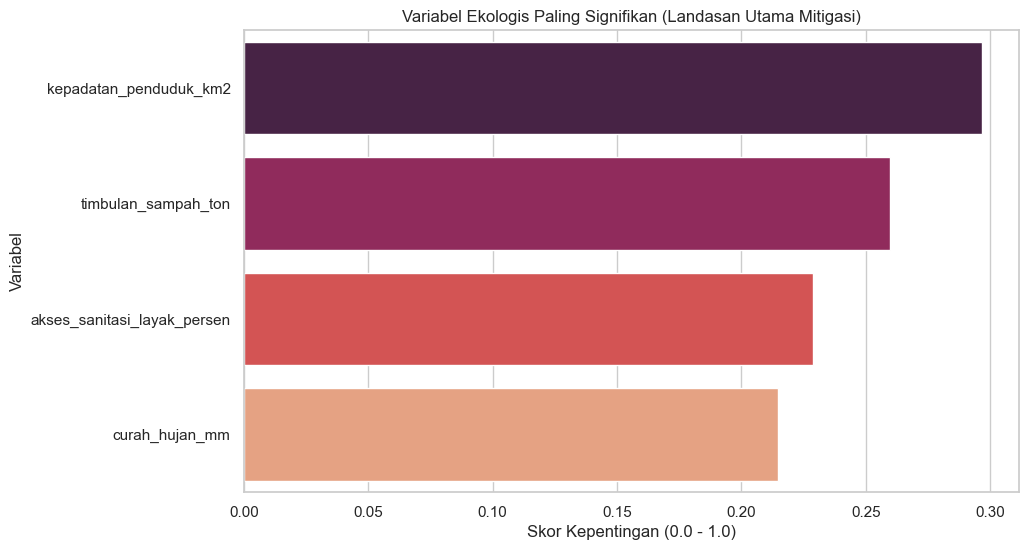

['features_mitigasi.pkl']

In [50]:
# ==========================================
# IDENTIFIKASI VARIABEL EKOLOGIS SIGNIFIKAN
# ==========================================

# 1. Pilih Variabel Ekologis (X) dan Target Morbiditas (y)
features = ['curah_hujan_mm', 'timbulan_sampah_ton', 'kepadatan_penduduk_km2', 'akses_sanitasi_layak_persen']
X = df_gabungan[features]
y = df_gabungan['IR_DBD_per_100k']

# 2. Training Random Forest untuk Menilai Signifikansi
model_rf = RandomForestRegressor(n_estimators=1000, random_state=42)
model_rf.fit(X, y)

# 3. Ekstraksi Tingkat Signifikansi (Feature Importance)
importances = pd.DataFrame({
    'Variabel': features,
    'Tingkat_Signifikansi': model_rf.feature_importances_
}).sort_values(by='Tingkat_Signifikansi', ascending=False)

# Visualisasi Detail Signifikansi
plt.figure(figsize=(10, 6))
sns.barplot(x='Tingkat_Signifikansi', y='Variabel', data=importances, palette='rocket')
plt.title("Variabel Ekologis Paling Signifikan (Landasan Utama Mitigasi)")
plt.xlabel("Skor Kepentingan (0.0 - 1.0)")
plt.show()

joblib.dump(model_rf, 'model_mitigasi_dbd.pkl')
joblib.dump(features, 'features_mitigasi.pkl')

['features_list.pkl']

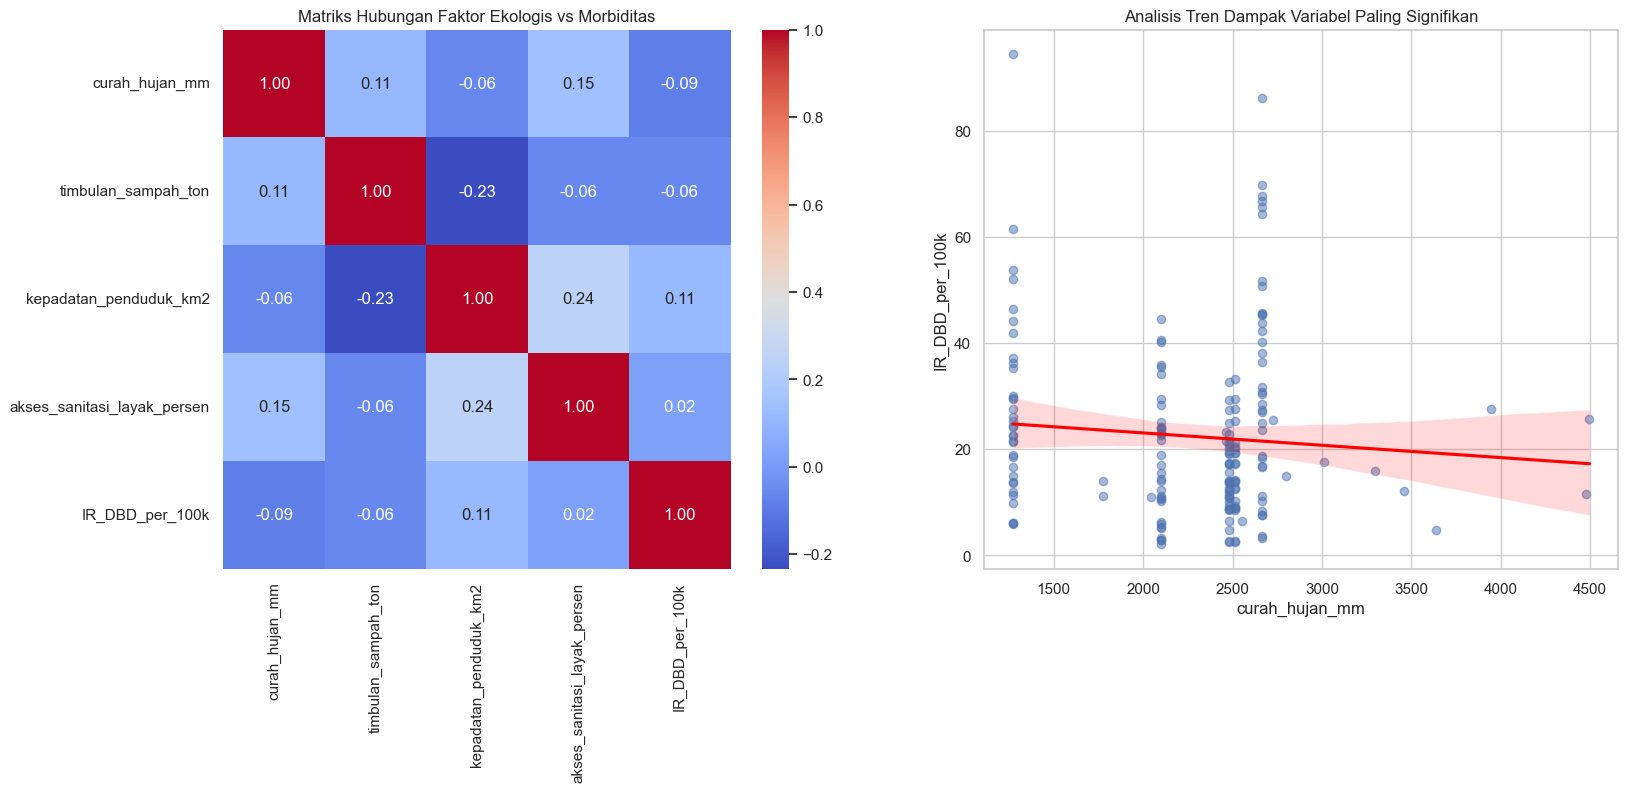

In [51]:

# ==========================================
# ANALISIS STATISTIK MENDALAM (LANDASAN MITIGASI)
# ==========================================
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# A. Heatmap Korelasi: Hubungan Antar Faktor
corr = df_gabungan[features + ['IR_DBD_per_100k']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", ax=ax[0])
ax[0].set_title("Matriks Hubungan Faktor Ekologis vs Morbiditas")

# B. Analisis Tren Variabel Teratas (Contoh: Curah Hujan vs Kasus)
# Ganti 'curah_hujan_mm' dengan variabel nomor 1 hasil Random Forest Anda
sns.regplot(x='curah_hujan_mm', y='IR_DBD_per_100k', data=df_gabungan, 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=ax[1])
ax[1].set_title("Analisis Tren Dampak Variabel Paling Signifikan")

df_gabungan.to_csv('df_gabungan.csv', index=False)
joblib.dump(model_rf, 'model_dbd_rf.pkl')
joblib.dump(features, 'features_list.pkl')

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# 1. KONFIGURASI HALAMAN
st.set_page_config(
    page_title="Monitoring Pencegahan DBD",
    page_icon="🛡️",
    layout="wide"
)

# Style CSS Profesional
st.markdown("""
    <style>
    .main { background-color: #f4f7f6; }
    h1, h2, h3 { color: #1b5e20; font-weight: bold; }
    .stMetric { 
        background-color: #ffffff; 
        padding: 15px; 
        border-radius: 10px; 
        border-left: 10px solid #2e7d32;
    }
    </style>
    """, unsafe_allow_html=True)

# 2. LOAD DATA OTOMATIS
@st.cache_data
def load_automated_data():
    try:
        model = joblib.load('model_dbd_rf.pkl')
        features = joblib.load('features_list.pkl')
        # Membaca data gabungan terbaru hasil dari Notebook
        df = pd.read_csv('df_gabungan.csv')
        return model, features, df
    except Exception as e:
        st.error(f"Gagal memuat data otomatis: {e}")
        return None, None, None

model, features, df_master = load_automated_data()

# =================================================================
# HEADER DASHBOARD
# =================================================================
st.title("🛡️ Sistem Otomatis Strategi Pencegahan DBD")
st.write("Analisis otomatis variabel ekologis untuk menentukan langkah mitigasi di wilayah Jawa Tengah.")
st.markdown("---")

if df_master is not None:
    # SIDEBAR: Hanya untuk memilih wilayah
    st.sidebar.title("📍 Pilih Wilayah")
    list_kota = sorted(df_master['Kabupaten/Kota'].unique())
    selected_kota = st.sidebar.selectbox("Pilih Kabupaten/Kota untuk Dianalisis:", list_kota)

    # AMBIL DATA TERBARU (Baris terakhir untuk kota tersebut)
    data_terbaru = df_master[df_master['Kabupaten/Kota'] == selected_kota].iloc[-1]
    
    # Siapkan data untuk model (pastikan urutan kolom sesuai)
    input_ready = pd.DataFrame([data_terbaru[features]])
    
    # =================================================================
    # TAMPILAN DATA TERLOAD OTOMATIS
    # =================================================================
    st.subheader(f"📊 Kondisi Ekologis Terkini: {selected_kota} (Tahun {int(data_terbaru['Tahun'])})")
    
    c1, c2, c3, c4 = st.columns(4)
    # Mapping otomatis dari data terbaru
    hujan_val = data_terbaru['curah_hujan_mm']
    sampah_val = data_terbaru['timbulan_sampah_ton']
    kepadatan_val = data_terbaru['kepadatan_penduduk_km2']
    sanitasi_val = data_terbaru['akses_sanitasi_layak_persen']

    c1.metric("Curah Hujan", f"{hujan_val:.0f} mm")
    c2.metric("Timbulan Sampah", f"{sampah_val:,.0f} Ton")
    c3.metric("Kepadatan", f"{kepadatan_val:,.0f} Jiwa/km²")
    c4.metric("Akses Sanitasi", f"{sanitasi_val:.1f}%")

    st.markdown("---")

    # =================================================================
    # STRATEGI PENCEGAHAN SPESIFIK (LANDASAN UTAMA)
    # =================================================================
    st.header("🎯 Rekomendasi Langkah Pencegahan Strategis")
    st.write(f"Berdasarkan identifikasi variabel paling signifikan pada wilayah **{selected_kota}**, berikut adalah panduan teknisnya:")

    col_left, col_right = st.columns([1, 1])

    with col_left:
        # PENCEGAHAN BERBASIS IKLIM
        st.success("#### 🌧️ Mitigasi Dampak Curah Hujan")
        if hujan_val > 2000:
            st.write("**Metode: PSN 3M Plus Intensif**")
            st.write("- **Kuras:** Wadah air dikuras minimal 2x seminggu (siklus jentik lebih cepat di kelembapan tinggi).")
            st.write("- **Tutup:** Pastikan tandon air tertutup rapat agar nyamuk tidak bertelur setelah hujan.")
            st.write("- **Talang:** Pembersihan daun di talang atap untuk menghilangkan genangan statis.")
        else:
            st.write("- Sosialisasi pembersihan wadah air indoor yang sering terabaikan.")

        # PENCEGAHAN BERBASIS SANITASI
        st.success("#### 🚰 Mitigasi Melalui Sanitasi")
        if sanitasi_val < 80:
            st.write("**Metode: Larvasidasi & Manajemen Air**")
            st.write("- **Larvasidasi:** Pemberian bubuk abate pada bak mandi yang sulit dikuras secara fisik.")
            st.write("- **Drainase:** Pastikan air limbah rumah tangga mengalir lancar dan tidak menggenang terbuka.")
        else:
            st.write("- Pemeliharaan saluran air hujan agar tetap lancar dan bersih.")

    with col_right:
        # PENCEGAHAN BERBASIS KEPADATAN
        st.success("#### 👥 Pencegahan di Area Padat Penduduk")
        if kepadatan_val > 1200:
            st.write("**Metode: Gerakan 1 Rumah 1 Jumantik (G1W1J)**")
            st.write("- **Monitoring:** Setiap rumah wajib memantau jentik mandiri secara rutin setiap minggu.")
            st.write("- **Ventilasi:** Pasang kawat nyamuk pada ventilasi untuk rumah yang saling berdekatan.")
            st.write("- **Repelen:** Penggunaan repelen di siang hari (jam aktif nyamuk Aedes aegypti).")
        else:
            st.write("- Fokus pada pembersihan lahan kosong/kebun di sekitar area pemukiman.")

        # PENCEGAHAN BERBASIS SAMPAH
        st.success("#### ♻️ Eliminasi Breeding Sites (Sampah)")
        if sampah_val > 150000:
            st.write("**Metode: Manajemen Sampah Plastik & Ban**")
            st.write("- **Ban Bekas:** Ban tidak boleh dibiarkan terbuka; harus ditimbun atau dilubangi agar tidak menampung air.")
            st.write("- **Sampah Plastik:** Botol dan kaleng plastik harus diremukkan sebelum dibuang ke tempat tertutup.")
        else:
            st.write("- Pastikan sampah organik tidak menumpuk di area terbuka rumah.")

    # =================================================================
    # IDENTIFIKASI SIGNIFIKANSI (VISUALISASI)
    # =================================================================
    st.markdown("---")
    st.subheader("🔍 Identifikasi Signifikansi Variabel (Analisis Model)")
    
    
    # Plot Feature Importance Global
    feat_imp = pd.Series(model.feature_importances_, index=features).sort_values()
    fig, ax = plt.subplots(figsize=(10, 4))
    feat_imp.plot(kind='barh', color='#2e7d32', ax=ax)
    ax.set_title("Variabel yang Paling Mempengaruhi Angka DBD (Global)")
    st.pyplot(fig)

else:
    st.warning("Menunggu data gabungan... Pastikan Anda telah menjalankan Notebook dan menyimpan file 'df_gabungan.csv'.")

st.caption("Monitoring otomatis dikembangkan untuk mempercepat respon mitigasi DBD di Jawa Tengah.")

Overwriting app.py


In [53]:
# 1. Install Streamlit
!pip install -q streamlit

# 2. Dapatkan IP Address (PENTING: Copy angka ini!)
!curl ifconfig.me

# 3. Jalankan Streamlit dengan LocalTunnel
# Setelah kode ini jalan, KLIK LINK yang muncul (urllocalhost...)
# Lalu masukkan IP Address dari langkah no 2 ke dalam kotak "Tunnel Password"


125.162.210.253


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100    15  100    15    0     0     19      0 --:--:-- --:--:-- --:--:--    19


In [54]:
!streamlit run app.py & lt --port 8501

^C
